In [ ]:
github

## Assignment 1

## 1. Import libraries

In [60]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

## 2. Load Data

In [61]:
# Load the CSV file as reviews
reviews = pd.read_csv('turtle_reviews.csv')

#View DataFrame
print(reviews)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [62]:
#View DataFrame
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [63]:
#View the metadata
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [64]:
#Determine any missing values
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [65]:
#Determine descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 3. Drop Columns

In [66]:
#Drop unnecessary columns
reviews2 = reviews.drop(['language', 'platform'], axis=1)

In [67]:
#View column names
reviews2.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Rename columns

In [68]:
#Rename the column headers
reviews3 = reviews2.rename(columns={'remuneration (k£)': 'renumeration',
                            'spending_score (1-100)': 'spending_score'})

In [69]:
#View column names
reviews3.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 5. Save the DataFrame as a CSV file

In [70]:
#Create a CSV file as output
reviews3.to_csv('Reviews3.csv', index=False)

In [71]:
#Import new CSV file with Pandas
reviewsnew = pd.read_csv('Reviews3.csv')

#View DataFrame
print(reviewsnew)

      gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [72]:
#View DataFrame
reviewsnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### a) Spending vs Loyalty

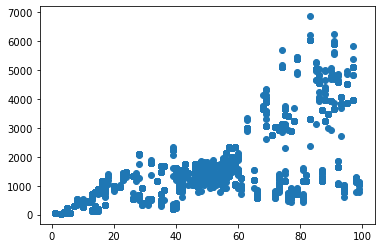

In [73]:
#Independent variable
y = reviewsnew["loyalty_points"] 

#Dependent variable
X = reviewsnew["spending_score"]

#Check for linearity
plt.scatter(X,y)

In [74]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = reviewsnew).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        08:47:17   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [76]:
#Create the linear regression model
#Set the the coefficient to 33.061693 and the constant to -75.052663
y_pred = (-75.052663) + 33.061693 * X

#View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

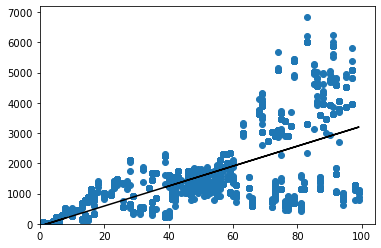

In [77]:
#Plot the data points with a scatterplot
plt.scatter(X, y)

#Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

#Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

#View the plot
plt.show()

### b) Renumeration vs Loyalty

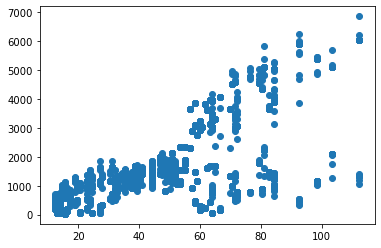

In [46]:
#Independent variable
y = reviewsnew["loyalty_points"] 

#Dependent variable
X = reviewsnew["renumeration"]

#Check for linearity
plt.scatter(X,y)

In [47]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = reviewsnew).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):          2.43e-209
Time:                        21:28:41   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [49]:
#Create the linear equation
y_pred = (-65.686513) + 34.187825 * X

#View the output
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

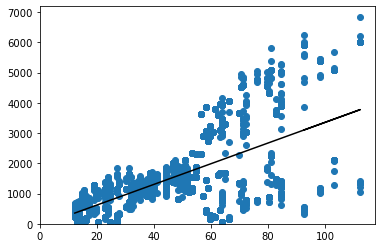

In [50]:
#Plot the data points with a scatterplot
plt.scatter(X, y)

#Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

#Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

#View the plot
plt.show()

### c) Age vs Loyalty

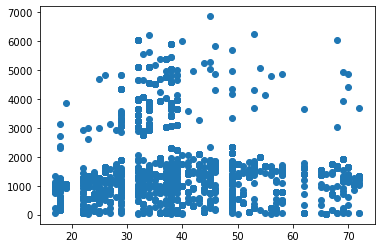

In [51]:
#Independent variable
y = reviewsnew["loyalty_points"] 

#Dependent variable
X = reviewsnew["age"]

#Check for linearity
plt.scatter(X,y)

In [52]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = reviewsnew).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 26 Nov 2022   Prob (F-statistic):             0.0577
Time:                        21:28:47   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [54]:
#Create the linear equation
y_pred = 1736.517739 - 4.012805 * X

#View the output
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

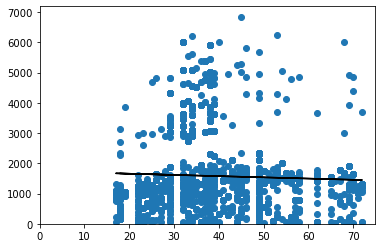

In [55]:
#Plot the data points with a scatterplot
plt.scatter(X, y)

#Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

#Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

#View the plot
plt.show()

## Assignment 2

## 1. Import libraries

In [3]:
#Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [4]:
#Load the CSV file as df2
df2 = pd.read_csv('Reviews3.csv')

#View DataFrame
print(df2)

      gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [5]:
#View DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [6]:
#Drop unnecessary columns
df3 = df2.drop(['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary' ], axis=1)

#View column names
df3.columns

Index(['renumeration', 'spending_score'], dtype='object')

In [7]:
#View DataFrame
df3.head()

,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [8]:
#View DataFrame
print(df3)

      renumeration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]


In [9]:
#Determine if there are any null values
df3.isnull().sum()

renumeration      0
spending_score    0
dtype: int64

In [10]:
#Determine descriptive statistics
df3.describe()

,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 3. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

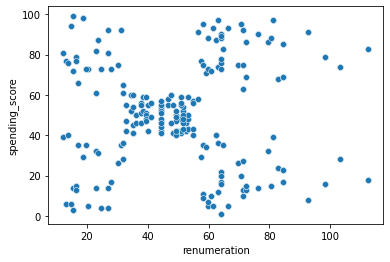

In [11]:
#Create a scatterplot with Seaborn
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df3)

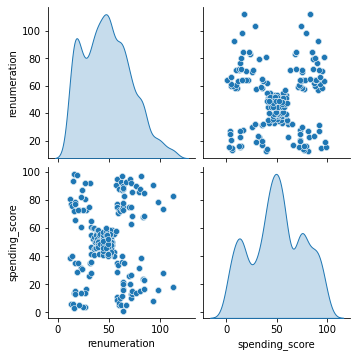

In [12]:
#Create a pairplot with Seaborn
x = df3[['renumeration', 'spending_score']]

sns.pairplot(df3,
             vars=x,
             diag_kind= 'kde')

## 4. Elbow and silhoutte methods

### Elbow method

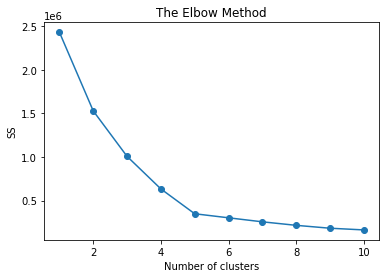

In [14]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

### Silhouette method

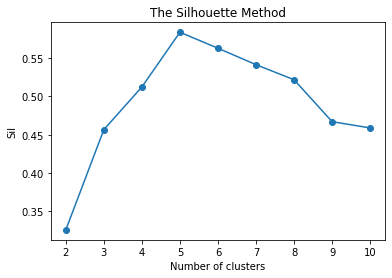

In [15]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

Let's use 3 clusters 

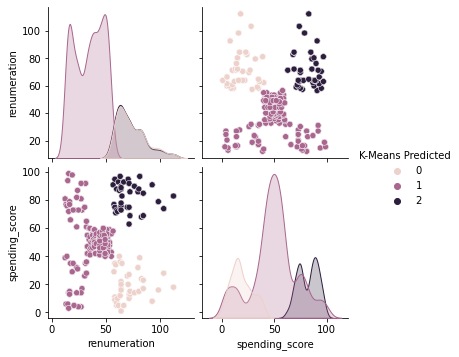

In [16]:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [17]:
#Check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

In [18]:
#View the K-Means predicted
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  1
2         13.12               6                  1
3         13.12              77                  1
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

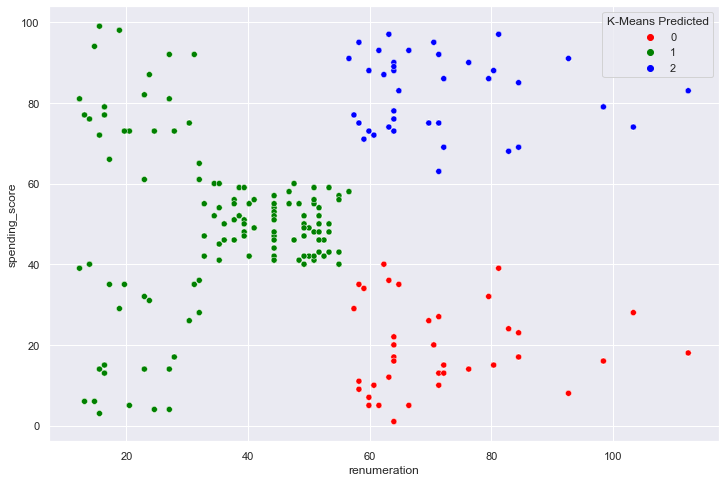

In [19]:
#Visualising the clusters
#Set plot size
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

Let's use 4 clusters 

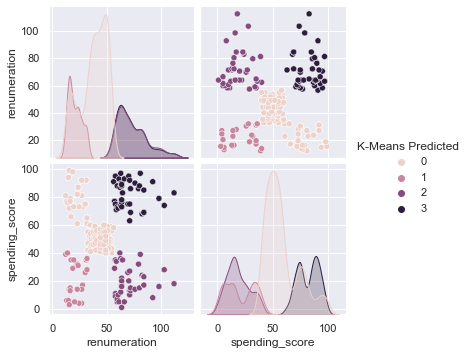

In [20]:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [21]:
#Check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [22]:
#View the K-Means predicted
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

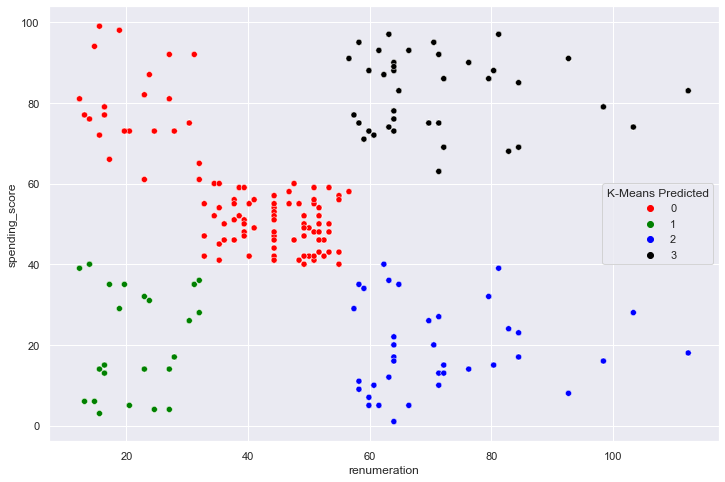

In [23]:
#Visualising the clusters
#Set plot size
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

Let's use 5 clusters 

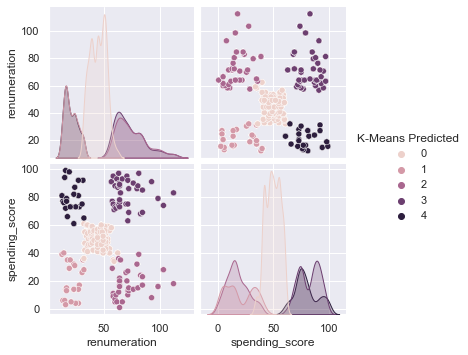

In [25]:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [26]:
#Check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [27]:
#View the K-Means predicted
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

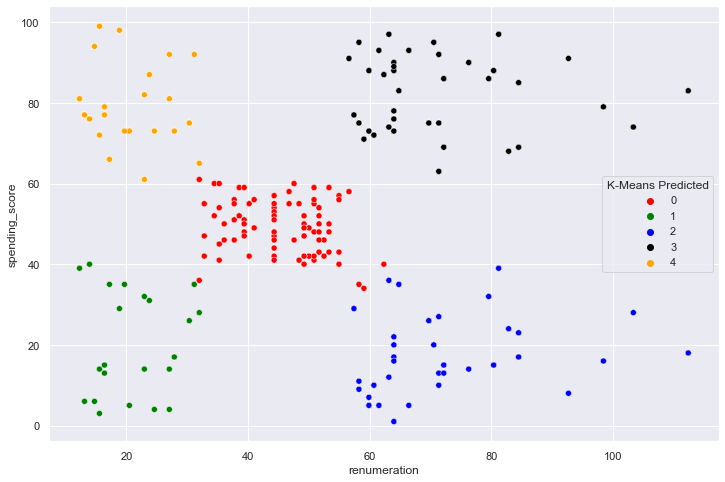

In [28]:
#Visualising the clusters
#Set plot size
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## Assignment 3

## 1. Load and explore the data

In [1]:
#Import all the necessary packages
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

#Import Counter
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set as df3
df4 = pd.read_csv('Reviews3.csv')


#View DataFrame
print(df4)

      gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [3]:
#View DataFrame
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [4]:
#See all columns within DataFrmae
df4.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [5]:
#Retain review and summary columns only 
df5 = df4.drop(['gender', 'age', 'loyalty_points', 'education', 'product', 'renumeration', 'spending_score' ], axis=1)

#View DataFrame Columns
df5.columns

Index(['review', 'summary'], dtype='object')

In [6]:
#Determine if there are any missing values 
df5.isnull().sum()

review     0
summary    0
dtype: int64

In [7]:
#View DataFrame
df5.head(5)

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [8]:
#Review: Change all to lower case and join with a space
df5['review'] = df5['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Preview the result
df5['review'].head(5)

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [9]:
#Summary: Change all to lower case and join with a space
df5['summary'] = df5['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Preview the result
df5['summary'].head(5)

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [11]:
#Replace all the punctuations in review column
df5['review'] = df5['review'].str.replace('[^\w\s]',"")

#View output
df5['review'].head(5)

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [12]:
#Replace all the puncuations in summary column
df5['summary'] = df5['summary'].str.replace('[^\w\s]',"")

#View output
df5['summary'].head(5)

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [13]:
#View duplicates for review column
df5.review.duplicated().sum()

50

In [14]:
#View duplicates for summary column
df5.summary.duplicated().sum()

649

In [15]:
#Drop duplicates in review column
df5new = df5.drop_duplicates(subset=['review', 'summary'])
df5new.reset_index(inplace=True)

In [16]:
#View DataFrame
df5new.head(5)

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [17]:
df5new.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [19]:
#Create new DataFrame (copy DataFrame)
CustomerRev = df5new.copy()

#View DataFrame
print(CustomerRev)

      index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty b

In [20]:
#Apply tokenisation to review column
CustomerRev['tokens'] = CustomerRev['review'].apply(word_tokenize)

#View DataFrame
CustomerRev['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [21]:
#Review: Create a word cloud
#Define empty list of tokens
all_tokens1 = []
for i in range(CustomerRev.shape[0]):
    #Add each token to the list 
    all_tokens1 = all_tokens1 + CustomerRev['tokens'][i]

In [22]:
#Define an empty string 
tokens1_string = ''
for value in all_tokens1:
    tokens1_string = tokens1_string + value + ' '

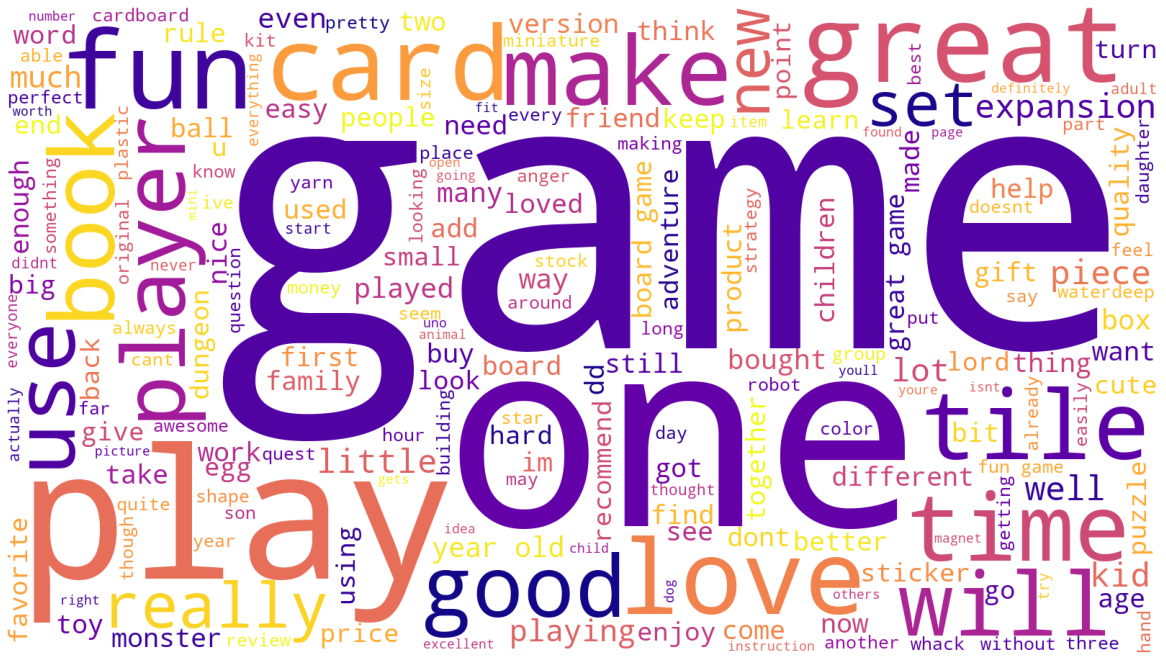

In [23]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens1_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [24]:
#Apply tokenisation to summary column
CustomerRev['tokens2'] = CustomerRev['summary'].apply(word_tokenize)

#View DataFrame
CustomerRev['tokens2'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens2, dtype: object

In [25]:
#Summary: Create a word cloud
#Define empty list of tokens
all_tokens2 = []
for i in range(CustomerRev.shape[0]):
    #Add each token to the list 
    all_tokens2 = all_tokens2 + CustomerRev['tokens2'][i]

In [26]:
all_tokens2

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [27]:
#Define an empty string 
tokens2_string = ''
for value in all_tokens2:
    tokens2_string = tokens2_string + value + ' '

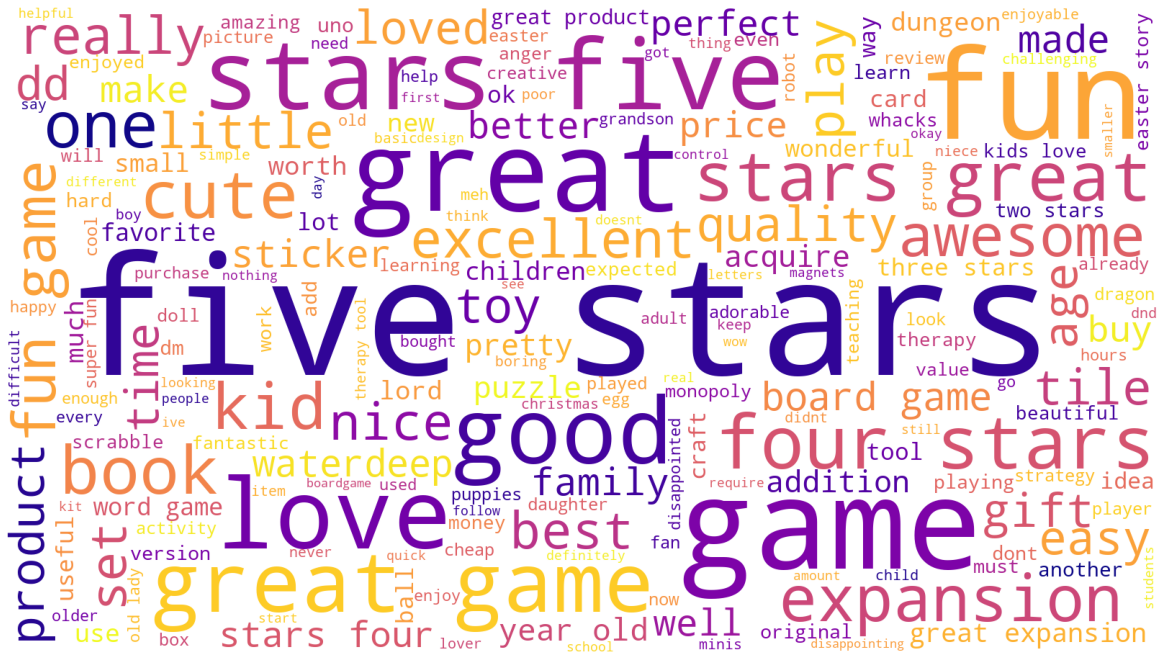

In [28]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [30]:
from nltk.probability import FreqDist
#Determine the frequency distribution for Reviews 
fdist = FreqDist(all_tokens1)

#Preview data
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [31]:
from nltk.probability import FreqDist
#Determine the frequency distribution for Summary
fdist = FreqDist(all_tokens2)

#Preview the data 
fdist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [33]:
#Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks, etc.)
#Deleting alphanumeric from Reviews 
tokens1 = [word for word in all_tokens1 if word.isalnum()]

In [34]:
#Deleting alphanumeric from Summary 
tokens2 = [word for word in all_tokens2 if word.isalnum()]

In [35]:
#Remove all the stopwords from Reviews- tokens 1
#Create a set of English stop words
english_stopwords = set(stopwords.words('english'))

#Create a filtered list of tokens without stop words.
tokens1b = [x for x in tokens1 if x.lower() not in english_stopwords]

In [36]:
#Remove all the stopwords from Summary- tokens 2
#Create a set of English stop words
english_stopwords = set(stopwords.words('english'))

#Create a filtered list of tokens without stop words.
tokens2b = [x for x in tokens2 if x.lower() not in english_stopwords]

### 4c) Create wordcloud without stopwords

In [37]:
#Create a wordcloud without stop words for Reviews
#Define an empty string variable.
tokens1b_string = ''

for value in tokens1b:
    #Add each filtered token word to the string.
    tokens1b_string = tokens1b_string + value + ' '

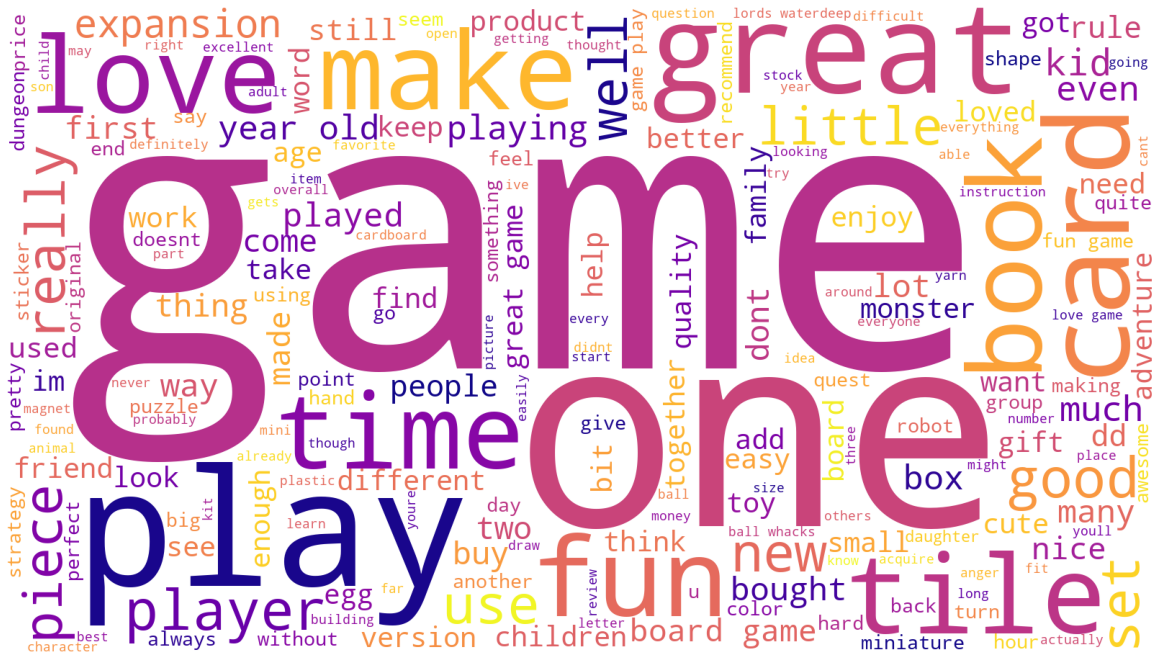

In [38]:
#Plot the wordcloud image for Reviews 
#Create a WordCloud
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens1b_string) 

#Plot the WordCloud image                     
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [39]:
#Create a wordcloud without stop words for Summary 
#Define an empty string variable
tokens2b_string = ''

for value in tokens2b:
    #Add each filtered token word to the string.
    tokens2b_string = tokens2b_string + value + ' '

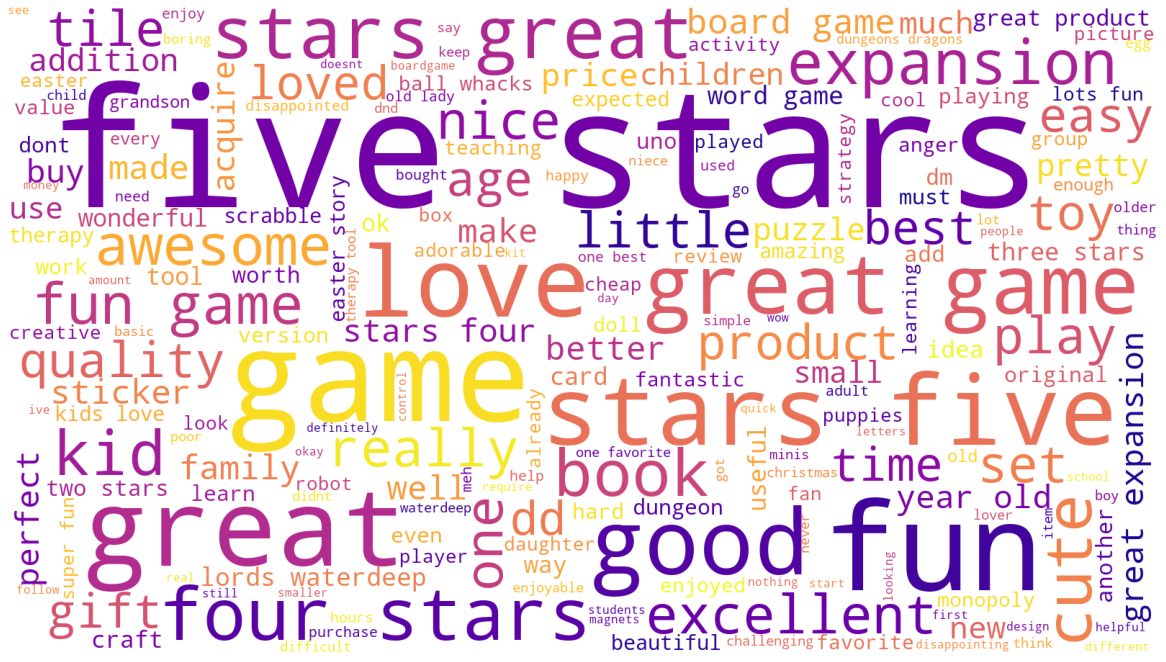

In [40]:
#Plot the wordcloud image for Summary 
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2b_string) 

#Plot the WordCloud image                      
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [41]:
#Determine the frequency distribution for Reviews 
fdist_1 = FreqDist(tokens1b)

#Preview data
fdist_1

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [42]:
#Determine the frequency distribution for Summary 
fdist_2 = FreqDist(tokens2b)

#Preview data
fdist_2

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [43]:
#Generate a DataFrame from Counter
counts_1 = pd.DataFrame(Counter(tokens1b).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

#Preview data
counts_1

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


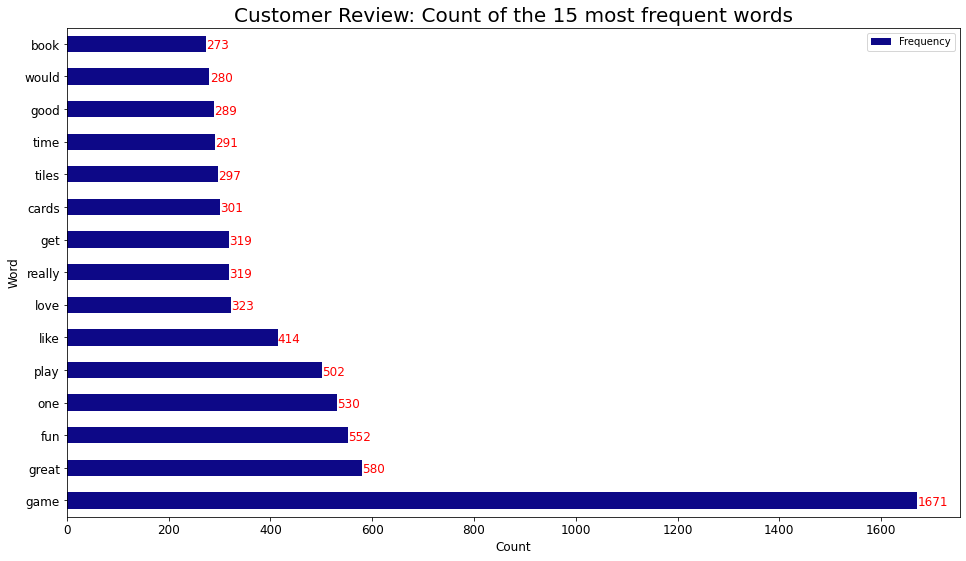

In [44]:
#Set the plot type
ax = counts_1.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

#Set the labels
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer Review: Count of the 15 most frequent words",
             fontsize=20)

#Draw the bar labels
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [45]:
#Generate a DataFrame from Counter
counts_2 = pd.DataFrame(Counter(tokens2b).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

#Preview data
counts_2

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


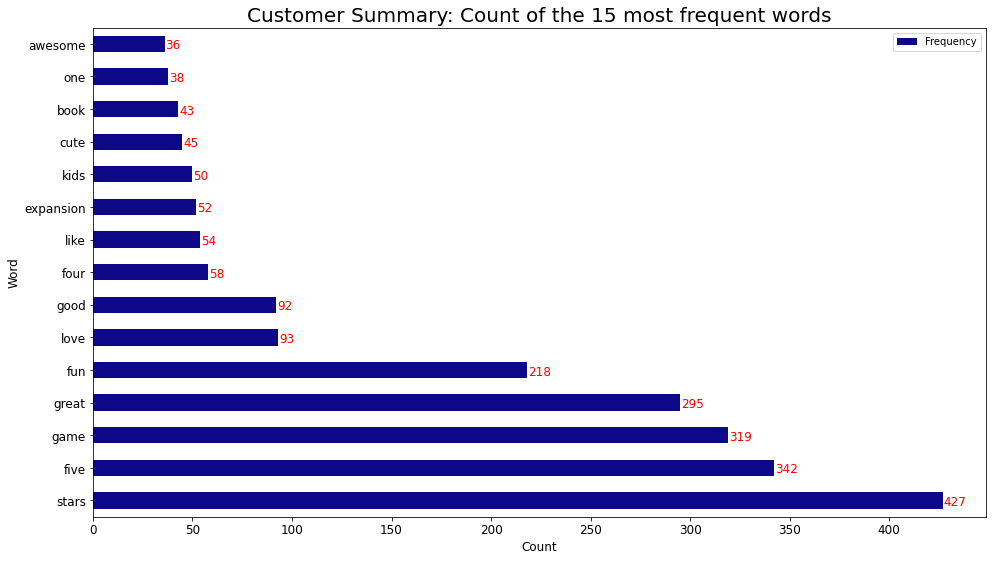

In [46]:
#Set the plot type
ax = counts_2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

#Set the labels
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer Summary: Count of the 15 most frequent words",
             fontsize=20)

#Draw the bar labels
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity and sentiment scores for the respective columns

In [47]:
#Define a function to extract a polarity score for the comment
def generate_polarity(Review):
    return TextBlob(Review).sentiment[0]

#Populate a new column with polarity scores for each comment
CustomerRev['polarity1'] = CustomerRev['review'].apply(generate_polarity)

#Preview the result
CustomerRev['polarity1'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity1, dtype: float64

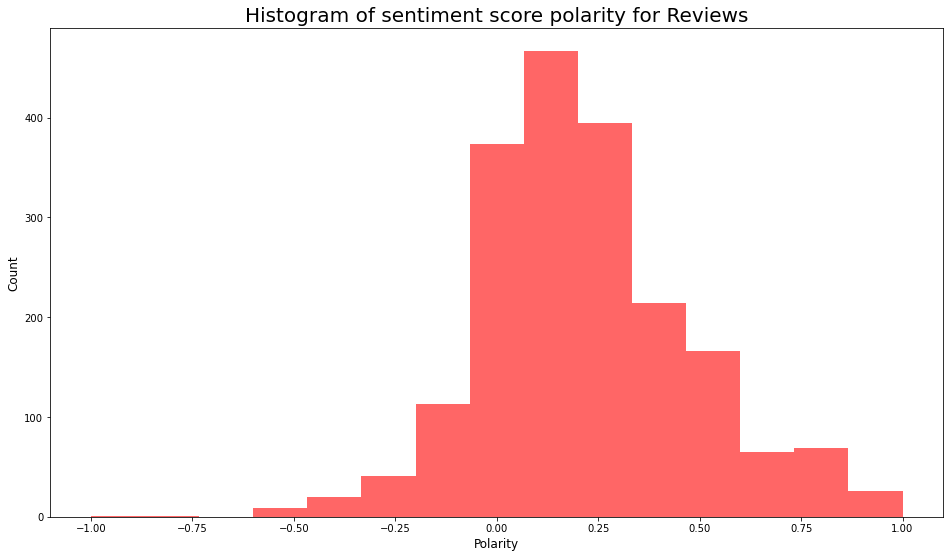

In [48]:
#Review: Create a histogram plot of polarity 
#Set the number of bins
num_bins = 15

#Set the plot area
plt.figure(figsize=(16,9))

#Define the bars
n, bins, patches = plt.hist(CustomerRev['polarity1'], num_bins, facecolor='red', alpha=0.6)

#Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Reviews', fontsize=20)

plt.show()

In [49]:
#Define a function to extract a polarity score for the comment
def generate_polarity(Summary):
    return TextBlob(Summary).sentiment[0]

#Populate a new column with polarity scores for each comment
CustomerRev['polarity2'] = CustomerRev['summary'].apply(generate_polarity)

#Preview the result
CustomerRev['polarity2'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity2, dtype: float64

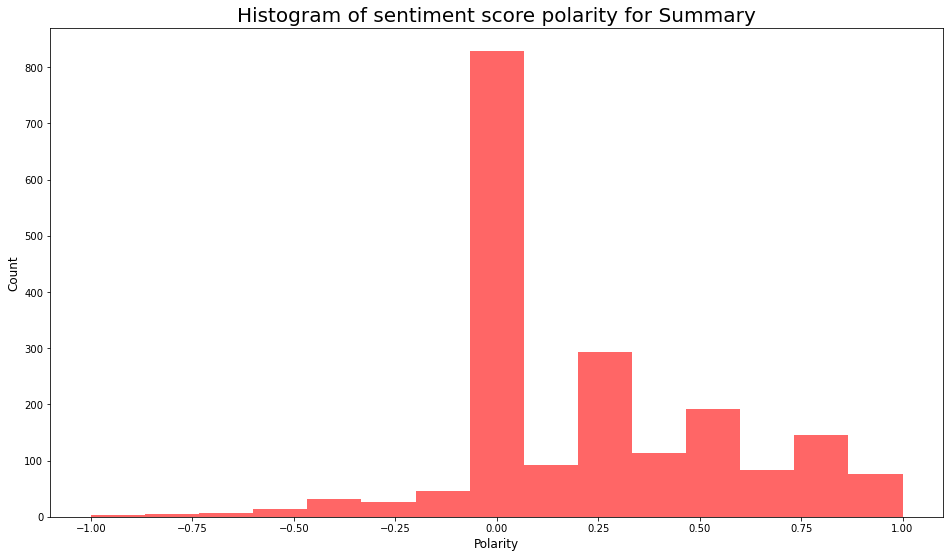

In [50]:
#Summary: Create a histogram plot of polarity 
#Set the number of bins
num_bins = 15

#Set the plot area
plt.figure(figsize=(16,9))

#Define the bars
n, bins, patches = plt.hist(CustomerRev['polarity2'], num_bins, facecolor='red', alpha=0.6)

#Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [52]:
#Top 20 negative reviews
CustomerRev.sort_values('polarity1', ascending=True).head(20)

,index,review,summary,tokens,tokens2,polarity1,polarity2
207,208,booo unles you are patient know how to measure...,boring unless you are a craft person which i am,"[booo, unles, you, are, patient, know, how, to...","[boring, unless, you, are, a, craft, person, w...",-1.000000,-1.00
181,182,incomplete kit very disappointing,incomplete kit,"[incomplete, kit, very, disappointing]","[incomplete, kit]",-0.780000,0.00
1773,1804,im sorry i just find this product to be boring...,disappointing,"[im, sorry, i, just, find, this, product, to, ...",[disappointing],-0.583333,-0.60
362,364,one of my staff will be using this game soon s...,anger control game,"[one, of, my, staff, will, be, using, this, ga...","[anger, control, game]",-0.550000,-0.55
1501,1524,expensive for what you get,two stars,"[expensive, for, what, you, get]","[two, stars]",-0.500000,0.00
116,117,i bought this as a christmas gift for my grand...,stickers,"[i, bought, this, as, a, christmas, gift, for,...",[stickers],-0.500000,0.00
229,230,i found the directions difficult,three stars,"[i, found, the, directions, difficult]","[three, stars]",-0.500000,0.00
289,290,instructions are complicated to follow,two stars,"[instructions, are, complicated, to, follow]","[two, stars]",-0.500000,0.00
300,301,difficult,three stars,[difficult],"[three, stars]",-0.500000,0.00
226,227,this was a gift for my daughter i found it dif...,two stars,"[this, was, a, gift, for, my, daughter, i, fou...","[two, stars]",-0.500000,0.00


In [53]:
#Top 20 negative summaries
CustomerRev.sort_values('polarity2', ascending=True).head(20)

,index,review,summary,tokens,tokens2,polarity1,polarity2
207,208,booo unles you are patient know how to measure...,boring unless you are a craft person which i am,"[booo, unles, you, are, patient, know, how, to...","[boring, unless, you, are, a, craft, person, w...",-1.000000,-1.000000
21,21,these are cute tatoos for those who love pirat...,the worst value ive ever seen,"[these, are, cute, tatoos, for, those, who, lo...","[the, worst, value, ive, ever, seen]",0.050000,-1.000000
819,829,ive discovered that im really new school when ...,boring,"[ive, discovered, that, im, really, new, schoo...",[boring],0.156399,-1.000000
1148,1166,before this i hated running any rpg campaign d...,before this i hated running any rpg campaign d...,"[before, this, i, hated, running, any, rpg, ca...","[before, this, i, hated, running, any, rpg, ca...",-0.133333,-0.900000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
785,793,my mom already owned an acquire game but she a...,disappointed,"[my, mom, already, owned, an, acquire, game, b...",[disappointed],-0.046364,-0.750000
1591,1620,i was thinking it was a puppet but it is not i...,disappointed,"[i, was, thinking, it, was, a, puppet, but, it...",[disappointed],-0.218750,-0.750000
143,144,my kids grew up with a peg bench and hammer an...,disappointed,"[my, kids, grew, up, with, a, peg, bench, and,...",[disappointed],0.108173,-0.750000
623,631,eggs split and were unusable,disappointed,"[eggs, split, and, were, unusable]",[disappointed],0.000000,-0.750000
361,363,i found that this card game does the opposite ...,promotes anger instead of teaching calming met...,"[i, found, that, this, card, game, does, the, ...","[promotes, anger, instead, of, teaching, calmi...",-0.126190,-0.700000


In [54]:
#Top 20 positive reviews
CustomerRev.sort_values('polarity1', ascending=0).head(20)

#Alternatively
CustomerRev.sort_values('polarity1', ascending=False).head(20)

,index,review,summary,tokens,tokens2,polarity1,polarity2
782,790,perfect,aquire game,[perfect],"[aquire, game]",1.0,-0.4
1695,1726,excellent toy to simulate thought,five stars,"[excellent, toy, to, simulate, thought]","[five, stars]",1.0,0.0
193,194,awesome gift,five stars,"[awesome, gift]","[five, stars]",1.0,0.0
1929,1967,perfect for tutoring my grandson in spelling,tutoring,"[perfect, for, tutoring, my, grandson, in, spe...",[tutoring],1.0,0.0
1159,1177,awesome addition to my rpg gm system,five stars,"[awesome, addition, to, my, rpg, gm, system]","[five, stars]",1.0,0.0
1150,1168,best set buy 2 if you have the means,five stars,"[best, set, buy, 2, if, you, have, the, means]","[five, stars]",1.0,0.0
517,524,perfect just what i ordered,five stars,"[perfect, just, what, i, ordered]","[five, stars]",1.0,0.0
1684,1715,awesome toy,five stars,"[awesome, toy]","[five, stars]",1.0,0.0
1689,1720,it is the best thing to play with and also min...,three stars,"[it, is, the, best, thing, to, play, with, and...","[three, stars]",1.0,0.0
613,621,wonderful for my grandson to learn the resurre...,five stars,"[wonderful, for, my, grandson, to, learn, the,...","[five, stars]",1.0,0.0


In [55]:
#Top 20 positive summaries
CustomerRev.sort_values('polarity2', ascending=0).head(20)

,index,review,summary,tokens,tokens2,polarity1,polarity2
1014,1028,include all items got the package quickly,one of the best,"[include, all, items, got, the, package, quickly]","[one, of, the, best]",0.333333,1.0
1899,1935,quick fun easy to learn wide age range fast pl...,excellent,"[quick, fun, easy, to, learn, wide, age, range...",[excellent],0.223810,1.0
805,815,love this game and have been playing it for ov...,one of the best games ever,"[love, this, game, and, have, been, playing, i...","[one, of, the, best, games, ever]",0.366667,1.0
1601,1630,received item todaysuper fast shipment i cant ...,awesome learning tool,"[received, item, todaysuper, fast, shipment, i...","[awesome, learning, tool]",0.200000,1.0
162,163,this was a christmas present for a nephew who ...,he was very happy with his gift,"[this, was, a, christmas, present, for, a, nep...","[he, was, very, happy, with, his, gift]",0.500000,1.0
1152,1170,just what i needed for my collection group of ...,best orcs from wotc,"[just, what, i, needed, for, my, collection, g...","[best, orcs, from, wotc]",0.050000,1.0
1367,1388,love this can expand current game with some ne...,awesome expansion,"[love, this, can, expand, current, game, with,...","[awesome, expansion]",0.005587,1.0
1062,1078,if you have anyone in your life that enjoys bo...,perfect gift,"[if, you, have, anyone, in, your, life, that, ...","[perfect, gift]",0.333333,1.0
139,140,i bought 8 of these for my 3 year old daughter...,awesome sticker activity for the price,"[i, bought, 8, of, these, for, my, 3, year, ol...","[awesome, sticker, activity, for, the, price]",0.318750,1.0
1153,1171,easy to understand quick start hours of fun wi...,awesome,"[easy, to, understand, quick, start, hours, of...",[awesome],0.291667,1.0
